In [5]:
!pip install pandas --quiet 

You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
#STEP 1
#run this if using Anaconda or someother Jupyter notebook software to import your data file 
### Load the dataset
import numpy as np
Data = np.genfromtxt("synthetic_control.data", dtype=None)
type(Data)

numpy.ndarray

In [7]:
## Import Pandas and load the dataset into a pandas dataframe
## Pandas dataframe looks like a en excel and can be another representation of the data
import pandas as pd 
data_df = pd.read_csv("synthetic_control.data", delim_whitespace=True, header=None)
type(data_df)

pandas.core.frame.DataFrame

In [8]:

data_df['label'] = 0
data_df.loc[(data_df.index >=100),'label']= 1
data_df.loc[(data_df.index >= 200),'label']= 2
data_df.loc[(data_df.index >=300),'label']= 3
data_df.loc[(data_df.index >= 400),'label']= 4
data_df.loc[(data_df.index >= 500),'label']= 5

In [9]:
data_df.label.value_counts()

0    100
1    100
2    100
3    100
4    100
5    100
Name: label, dtype: int64

In [10]:


X = data_df.drop(columns='label')
Y = data_df.label

In [11]:


## N is the number of samples in a dataset
X = X.to_numpy()
N = X.shape[0]
N

600

In [12]:
## T is the number of timestamps in a single time-series
T = X.shape[1]
T

60

In [13]:
## Dimentionality of the time-series M=1 is univariate TS and M>1 is multivariate
M =1

In [14]:
## Generte the empty dataset in the shape of (N,T,M). This is specially useful when M>1
Dataset = np.zeros((N,T,M))
Dataset.shape

(600, 60, 1)

In [15]:
X = np.reshape(X, newshape=(600,60,1))
X.shape

(600, 60, 1)

In [16]:
## Generate the dataset
for i in range(Dataset.shape[0]):
    Dataset[i]= X[i]

Dataset.shape

(600, 60, 1)

You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


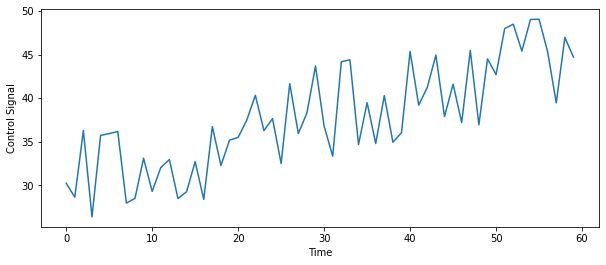

In [18]:
# STEP 5
!pip install matplotlib --quiet
## Plot a single Time-series before standardization
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(Dataset[210,:,0])
plt.xlabel("Time")
plt.ylabel("Control Signal")

plt.show()

In [20]:
!pip install sklearn --quiet

You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [31]:
## Standard Normalization
## StdDataset is the new dataset with standardazied values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
StdDataset = np.copy(Dataset)
for i in range(Dataset.shape[0]):
      StdDataset[i,:,:] = scaler.fit_transform(Dataset[i,:,:])

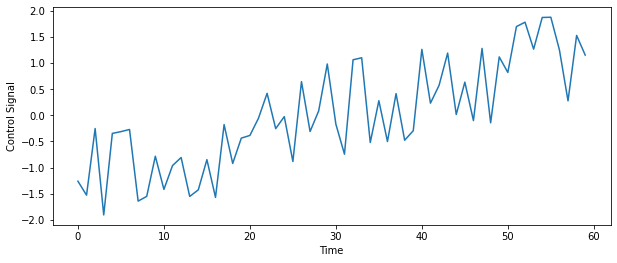

In [32]:
## Plot a single Time-series after standardization
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(StdDataset[210,:,0])
plt.xlabel("Time")
plt.ylabel("Control Signal")

plt.show()

In [33]:
# STEP 6

## Resampling the data
from scipy import signal
StdDataset_r = signal.resample(StdDataset, 600, axis=1)

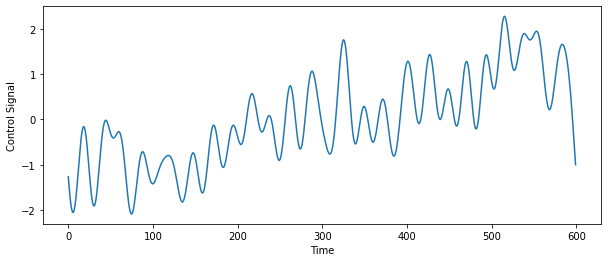

In [34]:
## Plot a single Time-series after Resampling
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(StdDataset_r[210,:,0])
plt.xlabel("Time")
plt.ylabel("Control Signal")

plt.show()

In [35]:
# STEP 7

##Add noise to the data
noise = np.random.normal(0, 1, StdDataset_r.shape)
new_StdDataset_r = StdDataset_r + noise

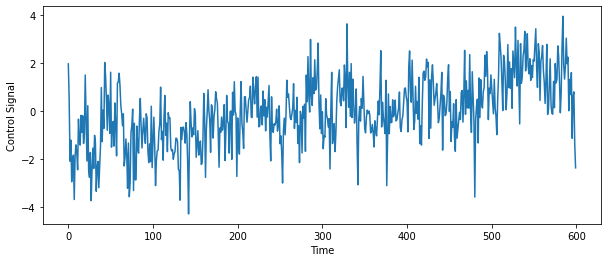

In [36]:
## Plot a single Time-series after adding noise
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(new_StdDataset_r[210,:,0])
plt.xlabel("Time")
plt.ylabel("Control Signal")

plt.show()

In [37]:
## Randomly cut first 30 observation of 10% of the series
import random
for i in range(60):
    num = random.randrange(600)
    new_StdDataset_r[num,0:30,:] = 0

## Randomly cut last 30 observation of 10% of the series
for i in range(60):
    num = random.randrange(600)
    new_StdDataset_r[num,-30:,:] = 0

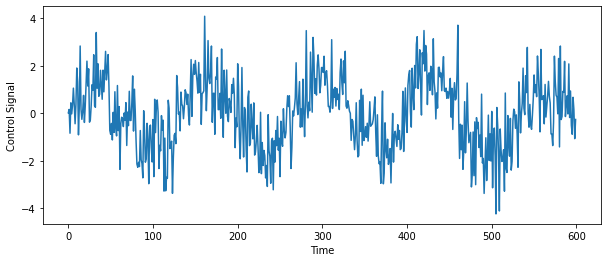

In [38]:
## Plot a single Time-series after adding noise
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(new_StdDataset_r[122,:,0])
plt.xlabel("Time")
plt.ylabel("Control Signal")

plt.show()

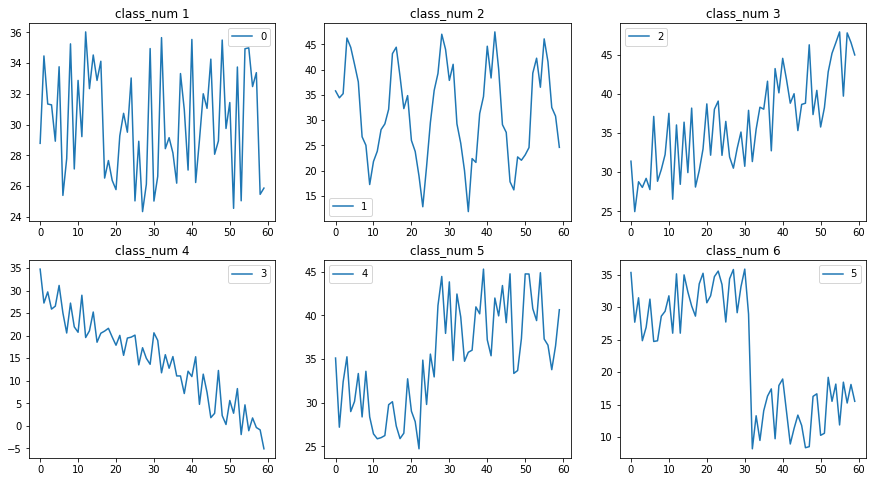

In [39]:
# STEP 8

## Plot all classes for visual comparision
## class 1 Normal
## class 2 Cyclic
## class 3 Increasing trend
## class 4 Decreasing trend
## class 5 Upward shift
## class 6 Downward shift

#original data in classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title('class_num ' + str(i+1))
    loc = np.where(Y == i)[0][0]
    plt.plot(Dataset[loc,:], label=Y[loc])
    plt.legend()

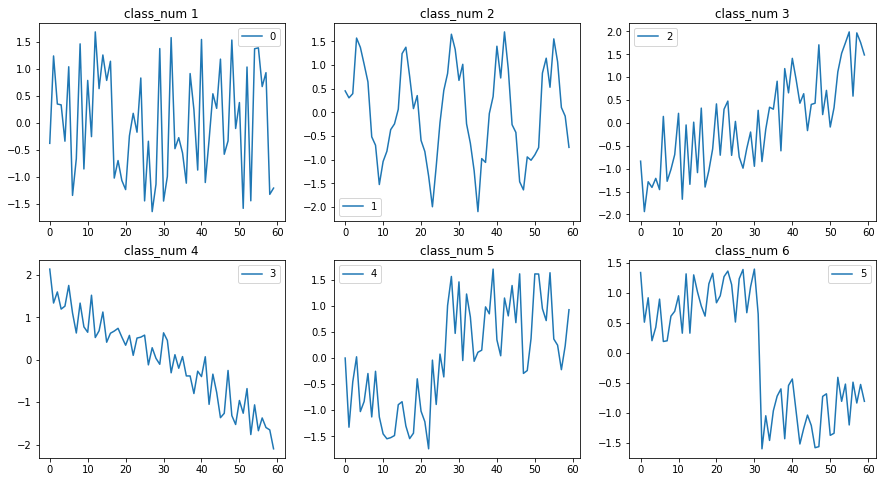

In [40]:
#standardized data
fig = plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title('class_num ' + str(i+1))
    loc = np.where(Y == i)[0][0]
    plt.plot(StdDataset[loc,:], label=Y[loc])
    plt.legend()

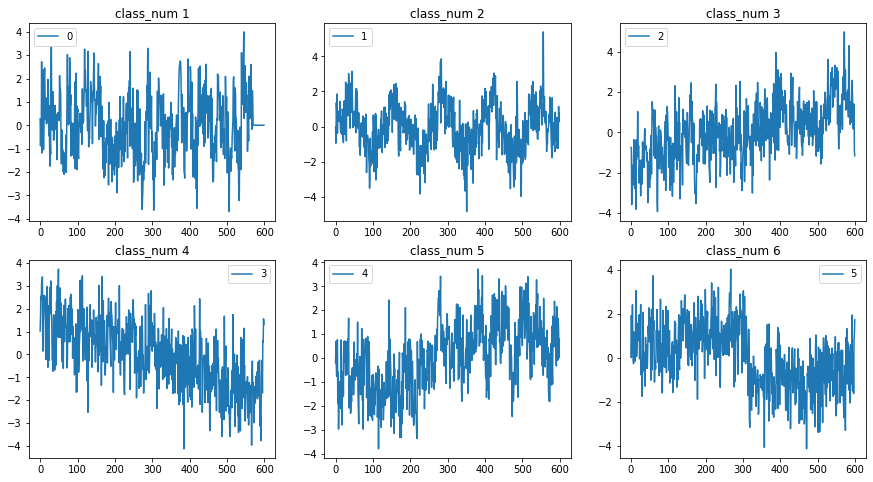

In [41]:
#noisy data
fig = plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title('class_num ' + str(i+1))
    loc = np.where(Y == i)[0][0]
    plt.plot(new_StdDataset_r[loc,:], label=Y[loc])
    plt.legend()

In [42]:
# STEP 9 

## Generate labels array
Labels = np.zeros((N,1))
Labels = Y
Labels.shape

(600,)

In [43]:
##Generate the initial training and test sets to feed to the model
## Original data
from sklearn.model_selection import train_test_split

##Generate train and test arrays. 
X_train, X_test, y_train, y_test = train_test_split(StdDataset, Labels, train_size=0.8 ,shuffle=True) 


# perform the classification on the noisy data

In [44]:
#noisy
X_train_rn, X_test__rn, y_train_rn, y_test_rn = train_test_split(new_StdDataset_r, Labels, train_size=0.8 ,shuffle=True) 
##Generate train and test arrays. shuffle to introduce randomness

In [45]:
%pip install sktime

     ---------------------------------------- 7.0/7.0 MB 13.5 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 233.8/233.8 KB ? eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Asif Bin Syed\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~cipy.libs\\libopenblas-57db09cfe174768fb409a6bb5a530d4c.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\asif bin syed\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [47]:
!pip install sktime

  Using cached sktime-0.13.4-py3-none-any.whl (7.0 MB)
  Using cached numba-0.56.3-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [48]:
# STEP 10 

## 1-nearest neighbor classifier with Euclidean distance as the distance measure
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.metrics import confusion_matrix, classification_report
classifier1 = KNeighborsTimeSeriesClassifier(distance="euclidean")
classifier1.fit(X_train_rn.squeeze(), y_train)
y_pred = classifier1.predict(X_test__rn.squeeze())
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[2 1 5 4 3 3]
 [4 3 2 8 7 1]
 [3 3 2 3 5 4]
 [2 5 1 6 5 0]
 [2 1 5 2 6 2]
 [5 2 5 2 1 5]]
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        18
           1       0.20      0.12      0.15        25
           2       0.10      0.10      0.10        20
           3       0.24      0.32      0.27        19
           4       0.22      0.33      0.27        18
           5       0.33      0.25      0.29        20

    accuracy                           0.20       120
   macro avg       0.20      0.21      0.20       120
weighted avg       0.20      0.20      0.20       120



In [49]:

## 1-nearest neighbor classifier with DTW (Dynamic Time Warping) as the distance measure
classifier2 = KNeighborsTimeSeriesClassifier(distance="dtw") ## Generate a classifier instance
classifier2.fit(X_train_rn, y_train)
y_pred = classifier2.predict(X_test__rn) ##Predict the not seen X_test labels

#confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[2 1 5 4 3 3]
 [4 3 2 8 7 1]
 [3 3 2 3 5 4]
 [2 5 1 6 5 0]
 [2 1 5 2 6 2]
 [5 2 5 2 1 5]]
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        18
           1       0.20      0.12      0.15        25
           2       0.10      0.10      0.10        20
           3       0.24      0.32      0.27        19
           4       0.22      0.33      0.27        18
           5       0.33      0.25      0.29        20

    accuracy                           0.20       120
   macro avg       0.20      0.21      0.20       120
weighted avg       0.20      0.20      0.20       120



In [50]:
## 1-nearest neighbor classifier with erp as the distance measure
classifier3 = KNeighborsTimeSeriesClassifier(distance="erp")
classifier3.fit(X_train_rn, y_train)
y_pred = classifier3.predict(X_test__rn)

#confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[2 1 5 4 3 3]
 [4 3 2 8 7 1]
 [3 3 2 3 5 4]
 [2 5 1 6 5 0]
 [2 1 5 2 6 2]
 [5 2 5 2 1 5]]
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        18
           1       0.20      0.12      0.15        25
           2       0.10      0.10      0.10        20
           3       0.24      0.32      0.27        19
           4       0.22      0.33      0.27        18
           5       0.33      0.25      0.29        20

    accuracy                           0.20       120
   macro avg       0.20      0.21      0.20       120
weighted avg       0.20      0.20      0.20       120



In [51]:
## Multiclass Support vector machines (SVM) with linear kernel
from sklearn.svm import SVC
classifier4 = SVC(kernel='linear', verbose=True)
classifier4.fit(X_train_rn.squeeze(), y_train_rn)
y_pred_rn = classifier4.predict(X_test__rn.squeeze()) ##Predict the not seen X_test labels

#confusion matrix and classification report    
cm = confusion_matrix(y_test_rn, y_pred_rn)
print(cm)
print(classification_report(y_test_rn, y_pred_rn))

[LibSVM][[16  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0 16  0  6  0]
 [ 0  0  0 21  0  2]
 [ 0  0  1  0 18  0]
 [ 0  0  0  1  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
           2       0.94      0.73      0.82        22
           3       0.95      0.91      0.93        23
           4       0.75      0.95      0.84        19
           5       0.90      0.95      0.93        20

    accuracy                           0.92       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.92      0.92       120



In [52]:
## Multiclass Support vector machines (SVM) with RBF kernel
from sklearn.svm import SVC
classifier5 = SVC(kernel='rbf', verbose=True)
classifier5.fit(X_train_rn.squeeze(), y_train_rn)
y_pred_rn = classifier5.predict(X_test__rn.squeeze()) ##Predict the not seen X_test labels

#confusion matrix and classification report    
cm = confusion_matrix(y_test_rn, y_pred_rn)
print(cm)
print(classification_report(y_test_rn, y_pred_rn))

[LibSVM][[16  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0 18  0  4  0]
 [ 0  0  0 22  0  1]
 [ 0  0  0  0 19  0]
 [ 0  0  0  3  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
           2       1.00      0.82      0.90        22
           3       0.88      0.96      0.92        23
           4       0.83      1.00      0.90        19
           5       0.94      0.85      0.89        20

    accuracy                           0.93       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.93      0.93       120



In [53]:
## Time-series classifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
classifier6 = TimeSeriesForestClassifier(n_estimators=5)
classifier6.fit(X_train_rn.squeeze(), y_train_rn)
y_pred_rn = classifier6.predict(X_test__rn.squeeze()) ##Predict the not seen X_test labels

#confusion matrix and classification report    
cm = confusion_matrix(y_test_rn, y_pred_rn)
print(cm)
print(classification_report(y_test_rn, y_pred_rn))

[[15  1  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        20

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [57]:
!pip install tensorflow_probability

     ---------------------------------------- 6.6/6.6 MB 15.1 MB/s eta 0:00:00
     ---------------------------------------- 90.3/90.3 KB ? eta 0:00:00


You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [58]:
# STEP 11

##Try a deep learning algorithm 
from sktime.classification.deep_learning.fcn import FCNClassifier
fcn = FCNClassifier(n_epochs=20, verbose=True)
fcn.fit(X_train_rn.squeeze(), y_train_rn)
y_pred_rn = fcn.predict(X_test__rn.squeeze()) ##Predict the not seen X_test labels

#confusion matrix and classification report    
cm = confusion_matrix(y_test_rn, y_pred_rn)
print(cm)
print(classification_report(y_test_rn, y_pred_rn))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 600, 128)          1152      
                                                                 
 batch_normalization (BatchN  (None, 600, 128)         512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 600, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 600, 256)          164096    
                                                                 
 batch_normalization_1 (Batc  (None, 600, 256)         1024      
 hNormalization)                                             

c:\users\asif bin syed\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asif bin syed\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asif bin syed\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [59]:
!pip install pipreqsnb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4142 sha256=afa5eb0a5fc35392d082a07f28b83e5089322f2503e28924cc5dde2814772647
  Stored in directory: c:\users\asif bin syed\appdata\local\pip\cache\wheels\fc\08\53\b2d8c3871408edb7893ce9d4b3df5b011340b9c124c44a8ac3
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=ea29a72d0574a8aaad5397475859a2e9734baaaa2c3ee9e4d2764f940414735e
  Stored in directory: c:\users\asif bin syed\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built pipreqsnb docopt


You should consider upgrading via the 'C:\Users\Asif Bin Syed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [60]:
pwd

'C:\\Users\\Asif Bin Syed\\Downloads\\python\\Smart_mfg'

In [65]:
from pipreqsnb import *

In [67]:
pipreqsnb C:\\Users\\Asif Bin Syed\\Downloads\\python\\Smart_mfg\\requirements.txt

SyntaxError: invalid syntax (3004469117.py, line 1)

In [68]:
pip freeze requirements.txt

absl-py==1.2.0
alabaster==0.7.12
anyio==3.6.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astroid==2.12.10
asttokens==2.0.5
astunparse==1.6.3
atomicwrites==1.4.1
attrs==21.4.0
autopep8==1.6.0
Babel==2.10.1
backcall==0.2.0
bcrypt==4.0.0
beautifulsoup4==4.11.1
binaryornot==0.4.4
black==22.8.0
bleach==5.0.0
cachetools==5.2.0
certifi==2022.5.18.1
cffi==1.15.0
chardet==5.0.0
charset-normalizer==2.0.12
click==8.1.3
cloudpickle==2.2.0
colorama==0.4.5
contourpy==1.0.5
cookiecutter==2.1.1
cryptography==38.0.1
cycler==0.11.0
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
Deprecated==1.2.13
diff-match-patch==20200713
dill==0.3.5.1
dm-tree==0.1.7
docopt==0.6.2
docutils==0.19
entrypoints==0.4
executing==0.8.3
fastjsonschema==2.15.3
flake8==4.0.1
flatbuffers==22.9.24
fonttools==4.38.0
gast==0.4.0
google-auth==2.13.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.50.0
h5py==3.7.0
idna==3.3
imagesize==1.4.1
importlib-metadata==4.11.4
inflection==0.5.1
intervaltree==3.1.